In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("C:/Users/priye/Desktop/LearningSpring2018/python/Week-4-Pandas/ml-20m/movies.csv")
type(movies)

pandas.core.frame.DataFrame

In [4]:
tags = pd.read_csv("C:/Users/priye/Desktop/LearningSpring2018/python/Week-4-Pandas/ml-20m/tags.csv")
type(tags)

pandas.core.frame.DataFrame

In [5]:
ratings = pd.read_csv("C:/Users/priye/Desktop/LearningSpring2018/python/Week-4-Pandas/ml-20m/ratings.csv")
type(ratings)

pandas.core.frame.DataFrame

In [6]:
del tags['timestamp']

In [7]:
del ratings['timestamp']

In [8]:
movies['year']= movies['title'].str.extract('.*\((.*)\),*',expand = True)

In [9]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [10]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [11]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [12]:
movies = movies.dropna()

In [13]:
tags= tags.dropna()

In [14]:
ratings = ratings.dropna()

In [15]:
table1=pd.merge(movies,ratings,on = 'movieId' , how = 'inner')
table1.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5


In [16]:
print(min(table1.year), 'to' , max(table1.year))

1891 to Das Millionenspiel


In [17]:
print(len(table1['year'].unique().tolist()))

124


In [18]:
2015-1893

122

2015-1893 = 122 and our query shows that there are only 115 unique values , it means movies have not ben recorded in the database for 7 distinct years


In [19]:
ratings['rating'].mean()

3.5255285642993797

In [20]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']

avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [21]:
table2=pd.merge(movies,avg_ratings,on = 'movieId' , how = 'inner')

In [22]:
isSciFi =table2['genres'].str.contains('Sci-Fi')
table2.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [23]:
table3=table2[isSciFi]
type(table3)
table3.head()

,movieId,title,genres,year,rating
23,24,Powder (1995),Drama|Sci-Fi,1995,3.199849
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995,3.952230
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995,3.898055
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,1996,2.144243
75,76,Screamers (1995),Action|Sci-Fi|Thriller,1995,3.009024


In [24]:
avgscifi_ratings = table3.groupby('year', as_index=False).mean()
avgSF=avgscifi_ratings.drop(avgscifi_ratings.index[90])

In [25]:
years = avgSF['year'].values
rating = avgSF['rating'].values
avgSF.head()

,year,movieId,rating
0,1898,125978.0,2.500000
1,1902,32898.0,3.738189
2,1910,99820.5,2.983333
3,1916,62383.0,3.257143
4,1920,25736.0,3.000000


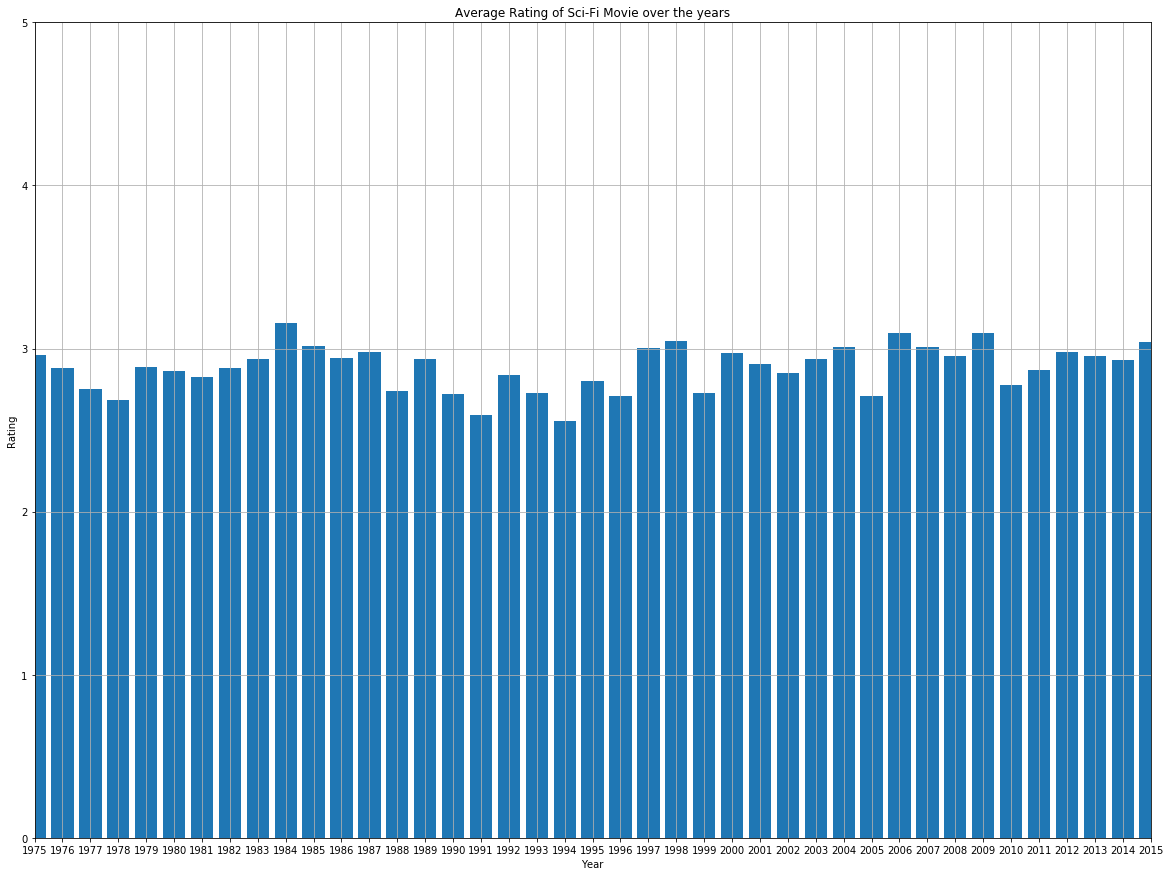

In [26]:
# switch to a line plot

fig, ax = plt.subplots(figsize=(20 ,15))
plt.bar(years,rating,)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Rating')

#label the figure
plt.title('Average Rating of Sci-Fi Movie over the years')

# to make more honest, start they y axis at 0
plt.axis([1975, 2015,0,5])
plt.grid(True)
plt.savefig('Average Rating of Sci-Fi Movie.jpeg')
plt.show()

